## Part 1: Simulation Exercise

### Overview

In this project you will investigate the exponential distribution in R and compare it with the Central Limit Theorem. The exponential distribution can be simulated in R with rexp(n, lambda) where lambda is the rate parameter. The mean of exponential distribution is 1/lambda and the standard deviation is also 1/lambda. Set lambda = 0.2 for all of the simulations. You will investigate the distribution of averages of 40 exponentials. Note that you will need to do a thousand simulations.

In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Simulations

In [2]:
lambda <- 0.2 # lambda for rexp
n <- 40 # number of exponetials
numberOfSimulations <- 1000 # number of tests

In [3]:
# set the seed to create reproducability
set.seed(1)

In [4]:
# run the test resulting in n x numberOfSimulations matrix
exponentialDistributions <- matrix(data=rexp(n * numberOfSimulations, lambda), nrow=numberOfSimulations)
exponentialDistributionMeans <- data.frame(means=apply(exponentialDistributions, 1, mean))

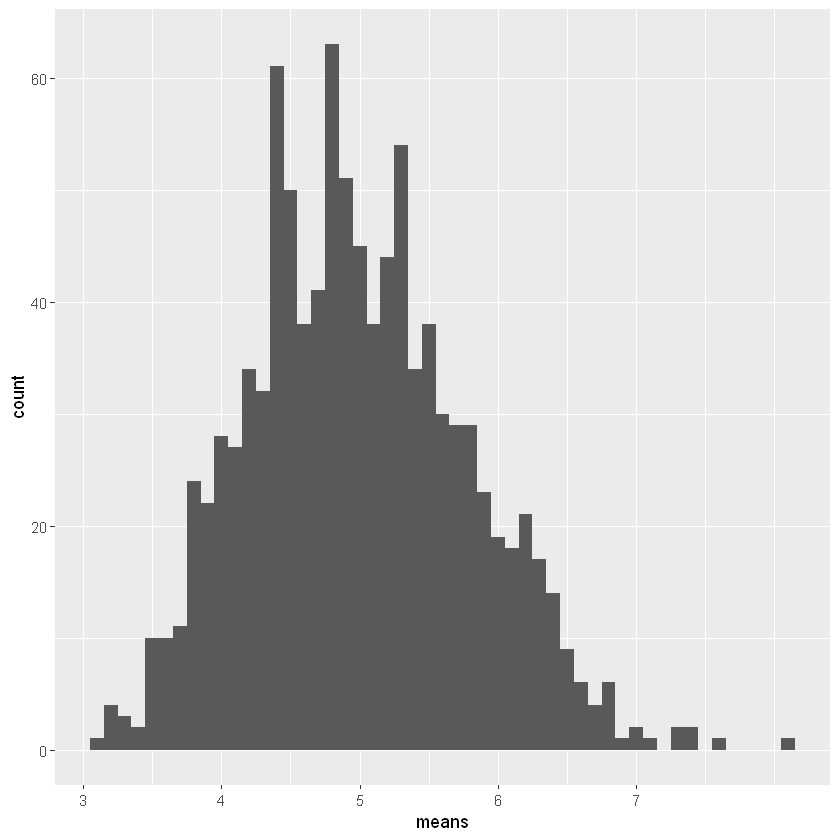

In [5]:
# plot the means
ggplot(data = exponentialDistributionMeans, aes(x = means)) + 
  geom_histogram(binwidth=0.1) +   
  scale_x_continuous(breaks=round(seq(min(exponentialDistributionMeans$means), max(exponentialDistributionMeans$means), by=1)))

### Sample Mean versus Theoretical Mean

In [6]:
#The expected mean mu of a exponential distribution of rate lambda is mu= frac{1}{\lambda}$

In [7]:
mu <- 1/lambda
mu

[1] 5

In [8]:
meanOfMeans <- mean(exponentialDistributionMeans$means)
meanOfMeans

[1] 4.990025

As you can see the expected mean and the avarage sample mean are very close 

### Sample Variance versus Theoretical Variance

In [9]:
#The expected standard deviation sigma of a exponential distribution of rate lambda is sigma = frac{1\lambda}{\sqrt{n}} 

In [10]:
sd <- 1/lambda/sqrt(n)
sd

[1] 0.7905694

In [11]:
Var <- sd^2
Var

[1] 0.625

In [12]:
sd_x <- sd(exponentialDistributionMeans$means)
sd_x

[1] 0.7859435

In [13]:
Var_x <- var(exponentialDistributionMeans$means)
Var_x

[1] 0.6177072

As you can see the standard deviations are very close

### Distribution

Warning message:
"Ignoring unknown parameters: arg"Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

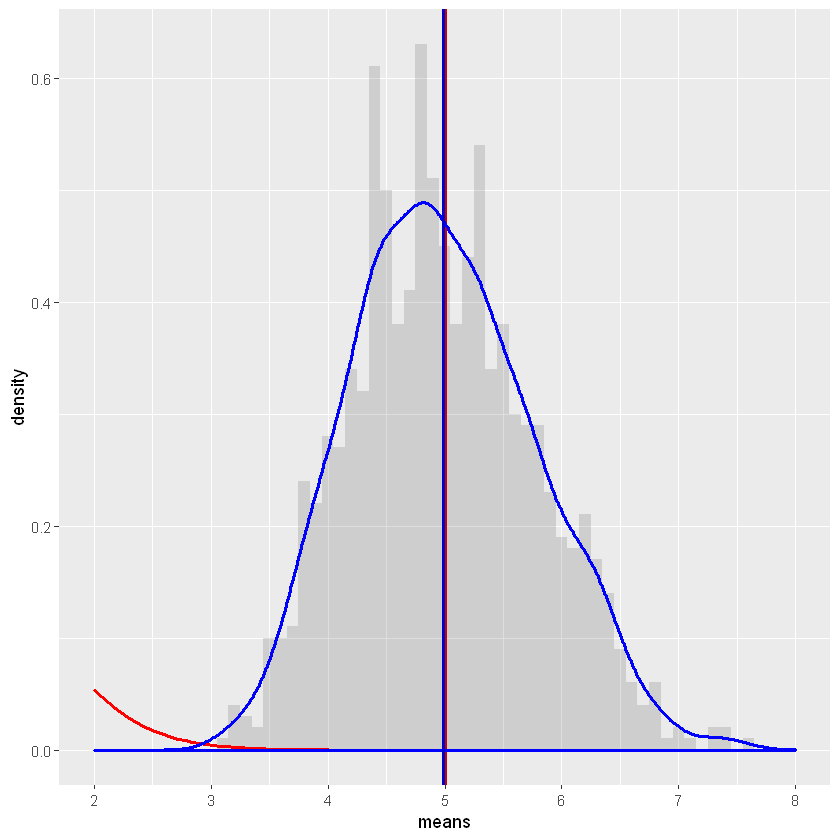

In [14]:
# plot the means
ggplot(data = exponentialDistributionMeans, aes(x = means)) + 
  geom_histogram(binwidth=0.1, aes(y=..density..), alpha=0.2) + 
  stat_function(fun = dnorm, arg = list(mean = mu , sd = sd), colour = "red", size=1) + 
  geom_vline(xintercept = mu, size=1, colour="#CC0000") + 
  geom_density(colour="blue", size=1) +
  geom_vline(xintercept = meanOfMeans, size=1, colour="#0000CC") + 
  scale_x_continuous(breaks=seq(mu-3,mu+3,1), limits=c(mu-3,mu+3)) 

As you can see from the graph, the calculated distribution of means of random sampled exponantial distributions, overlaps quite nice with the normal distribution with the expected values based on the given lambda